In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers,optimizers
import matplotlib.pyplot as plt

## Dataset - Bank Note

<a href = 'https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?resource=download'>Link to Dataset</a>

In [2]:
data = pd.read_csv('data.csv')
data.shape

(1372, 5)

In [3]:
X,y = data.iloc[:,:4],data.iloc[:,4:]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [5]:
model = Sequential([
    layers.Dense(10,input_shape=(4,),activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
33/33 [==============================] - 2s 18ms/step - loss: 1.5742 - accuracy: 0.3567 - val_loss: 1.4801 - val_accuracy: 0.3907
Epoch 2/10
33/33 [==============================] - 0s 6ms/step - loss: 1.3202 - accuracy: 0.3926 - val_loss: 1.2581 - val_accuracy: 0.4286
Epoch 3/10
33/33 [==============================] - 0s 6ms/step - loss: 1.1214 - accuracy: 0.4208 - val_loss: 1.0775 - val_accuracy: 0.4519
Epoch 4/10
33/33 [==============================] - 0s 6ms/step - loss: 0.9578 - accuracy: 0.4529 - val_loss: 0.9134 - val_accuracy: 0.4810
Epoch 5/10
33/33 [==============================] - 0s 6ms/step - loss: 0.8092 - accuracy: 0.4956 - val_loss: 0.7669 - val_accuracy: 0.5335
Epoch 6/10
33/33 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5627 - val_loss: 0.6465 - val_accuracy: 0.5743
Epoch 7/10
33/33 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.6190 - val_loss: 0.5515 - val_accuracy: 0.6093
Epoch 8/10
33/33 [=

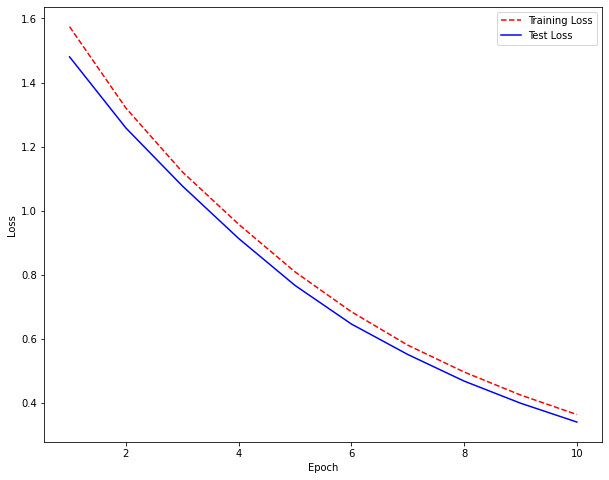

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(10,8))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [7]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.9300


[0.34071364998817444, 0.9300291538238525]

# Hidden layer nodes ~ Accuracy Score ~ 1/Loss

In [8]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

11/11 [==============================] - 0s 3ms/step
[[177  12]
 [ 12 142]]


<AxesSubplot:>

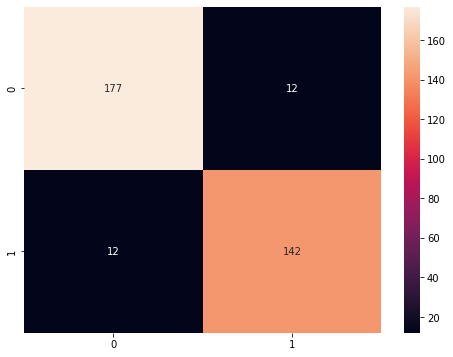

In [9]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.3g')

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       189
           1       0.92      0.92      0.92       154

    accuracy                           0.93       343
   macro avg       0.93      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343

